In [8]:
import numpy as np
import pandas as pd

from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

import matplotlib.pyplot as plt

In [2]:
ratings_df = pd.read_csv('data/ratings_small.csv')
ratings_df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [3]:
ratings_df = ratings_df[['userId', 'movieId', 'rating']]
ratings_df

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [4]:
reader = Reader(rating_scale=(1,5)) 
data = Dataset.load_from_df(ratings_df,reader)

### Probabilistic Matrix Factorization

In [5]:
# Surprise SVD algorithm is equivalent to Probabilistic Matrix Factorization
svd = SVD()
scores = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rsme = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rsme}')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8967  0.8952  0.8958  0.9063  0.8932  0.8974  0.0046  
MAE (testset)     0.6915  0.6904  0.6898  0.6955  0.6885  0.6911  0.0024  
Fit time          5.08    5.00    5.15    4.81    4.73    4.95    0.16    
Test time         0.21    0.12    0.12    0.11    0.13    0.14    0.03    
Average MAE: 0.6911406467767387
Average RMSE: 0.897442361848124


### Item Collaborative Filtering

In [6]:
from surprise.prediction_algorithms.knns import KNNWithMeans

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}

knn_m = KNNWithMeans(sim_options=sim_options)
scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rsme = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rsme}')

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9277  0.9284  0.9269  0.9246  0.9310  0.9277  0.0021  
MAE (testset)     0.7123  0.7103  0.7093  0.7110  0.7119  0.7110  0.0011  
Fit time          14.76   12.50   11.73   11.95   12.10   12.61   1.11    
Test time         7.07    5.79    5.90    5.87    5.76    6.08    0.50    
Average MAE: 0.7109640691560356
Average RMSE: 0.9277036887358865


### User Collaborative Filtering

In [7]:
# To use user-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between users
}

knn_m = KNNWithMeans(sim_options=sim_options)
scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rsme = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rsme}')

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9264  0.9238  0.9252  0.9205  0.9180  0.9228  0.0031  
MAE (testset)     0.7111  0.7071  0.7075  0.7046  0.7053  0.7071  0.0022  
Fit time          0.38    0.40    0.41    0.40    0.41    0.40    0.01    
Test time         1.48    1.43    1.43    1.48    1.43    1.45    0.03    
Average MAE: 0.7071060958811304
Average RMSE: 0.9228178508201907


## Changes in the Similarity Measure
Examine how the cosine, MSD (Mean Squared Difference), and Pearson
similarities impact the performances of User based Collaborative Filtering and
Item based Collaborative Filtering. Plot your results.

In [9]:
# User-based Collaborative Filtering
ub_mae = []
ub_rmse = []

measures = ['cosine', 'MSD', 'pearson_baseline']
for sim_measure in measures:
    
    # Set similarity options
    sim_options = {
    "name": sim_measure,
    "user_based": True,  # Compute  similarities between users
    }
    
    # Initialize model and cross_validation
    knn_m = KNNWithMeans(sim_options=sim_options)
    scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    # Computing mean scoring
    mean_mae = scores['test_mae'].mean()
    mean_rsme = scores['test_rmse'].mean()
    
    # Appending for graphing purposes
    ub_mae.append(mean_mae)
    ub_rmse.append(mean_rsme)
    

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9160  0.9160  0.9289  0.9240  0.9251  0.9220  0.0052  
MAE (testset)     0.7017  0.7041  0.7113  0.7091  0.7085  0.7069  0.0035  
Fit time          0.42    0.43    0.42    0.43    0.43    0.43    0.01    
Test time         1.68    1.61    1.50    1.54    1.44    1.55    0.08    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix.

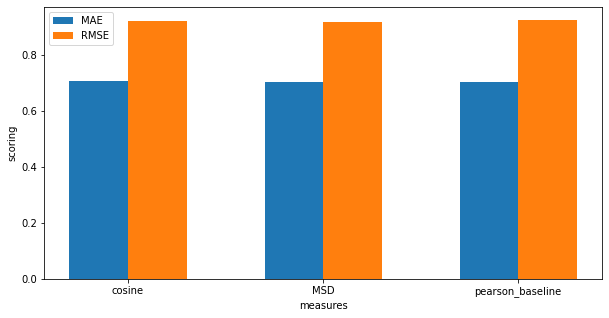

In [15]:
ind = np.arange(len(measures))
width = 0.3

plt.figure(figsize=(10,5))
plt.bar(ind, ub_mae, width, label='MAE')
plt.bar(ind + width, ub_rmse, width, label='RMSE')

plt.xlabel('measures')
plt.ylabel('scoring')

plt.xticks(ind + width/2, measures)

plt.legend(loc='best')
plt.show()


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9265  0.9282  0.9253  0.9348  0.9253  0.9280  0.0035  
MAE (testset)     0.7080  0.7122  0.7083  0.7173  0.7066  0.7105  0.0039  
Fit time          13.35   12.58   12.29   12.69   12.76   12.74   0.35    
Test time         6.28    6.32    6.27    6.41    5.92    6.24    0.17    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix.

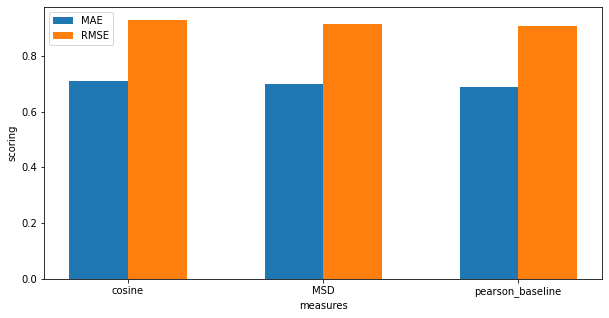

In [16]:
# Item-based Collaborative Filtering
ib_mae = []
ib_rmse = []

measures = ['cosine', 'MSD', 'pearson_baseline']
for sim_measure in measures:
    
    # Set similarity options
    sim_options = {
    "name": sim_measure,
    "user_based": False,  # Compute  similarities between items
    }
    
    # Initialize model and cross_validation
    knn_m = KNNWithMeans(sim_options=sim_options)
    scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    # Computing mean scoring
    mean_mae = scores['test_mae'].mean()
    mean_rsme = scores['test_rmse'].mean()
    
    # Appending for graphing purposes
    ib_mae.append(mean_mae)
    ib_rmse.append(mean_rsme)
    
ind = np.arange(len(measures))
width = 0.3

plt.figure(figsize=(10,5))
plt.bar(ind, ib_mae, width, label='MAE')
plt.bar(ind + width, ib_rmse, width, label='RMSE')

plt.xlabel('measures')
plt.ylabel('scoring')

plt.xticks(ind + width/2, measures)

plt.legend(loc='best')
plt.show()

In [20]:
ks = np.arange(20, 60, 5)

# User-based Collaborative Filtering
ub_mae = []
ub_rmse = []

for k in ks: 
    # Set similarity options
    sim_options = {
    "user_based": True,  # Compute  similarities between users
    }
    
    # Initialize model and cross_validation
    knn_m = KNNWithMeans(k, sim_options=sim_options)
    scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    # Computing mean scoring
    mean_mae = scores['test_mae'].mean()
    mean_rsme = scores['test_rmse'].mean()
    
    # Appending for graphing purposes
    ub_mae.append(mean_mae)
    ub_rmse.append(mean_rsme)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9173  0.9236  0.9206  0.9180  0.9257  0.9210  0.0032  
MAE (testset)     0.7025  0.7089  0.7060  0.7021  0.7100  0.7059  0.0032  
Fit time          0.19    0.22    0.20    0.23    0.17    0.20    0.02    
Test time         1.88    1.61    1.64    1.47    1.43    1.60    0.16    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

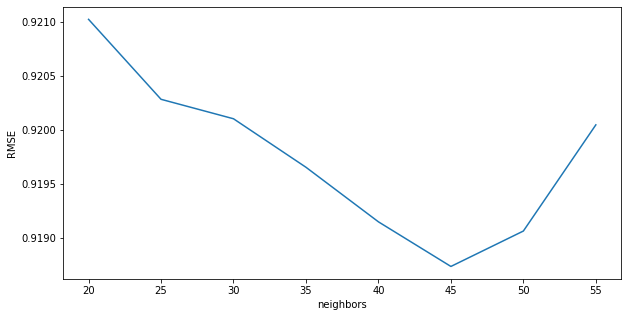

In [29]:
# ind = np.arange(len(ks))

plt.figure(figsize=(10,5))
# plt.plot(ks, ub_mae, label='MAE')
plt.plot(ks, ub_rmse)

plt.xlabel('neighbors')
plt.ylabel('RMSE')

# plt.xticks(ind + width/2, measures)

# plt.legend(loc='best')
plt.show() 

In [30]:
# Item-based Collaborative Filtering
ib_mae = []
ib_rmse = []

for k in ks: 
    # Set similarity options
    sim_options = {
    "user_based": False,  # Compute  similarities between users
    }
    
    # Initialize model and cross_validation
    knn_m = KNNWithMeans(k, sim_options=sim_options)
    scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    # Computing mean scoring
    mean_mae = scores['test_mae'].mean()
    mean_rsme = scores['test_rmse'].mean()
    
    # Appending for graphing purposes
    ib_mae.append(mean_mae)
    ib_rmse.append(mean_rsme)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9246  0.9261  0.9166  0.9227  0.9192  0.9218  0.0035  
MAE (testset)     0.7091  0.7108  0.7036  0.7046  0.7053  0.7067  0.0028  
Fit time          4.22    4.01    3.88    3.91    3.59    3.92    0.21    
Test time         5.72    5.87    6.04    5.58    5.92    5.83    0.16    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

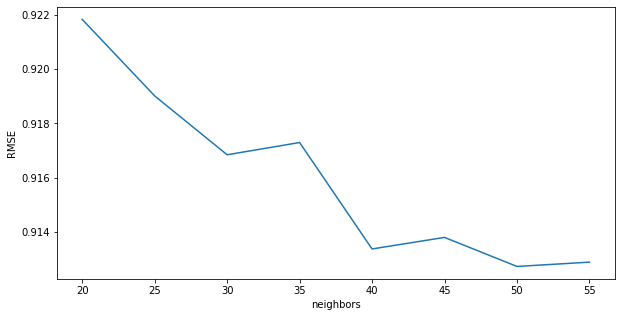

In [31]:
plt.figure(figsize=(10,5))
# plt.plot(ks, ub_mae, label='MAE')
plt.plot(ks, ib_rmse)

plt.xlabel('neighbors')
plt.ylabel('RMSE')

plt.show() 

8